# $Deep\: Learning\: and\: Machine\: Intelligence$
# Task 1


In [1]:
import pandas as pd
import numpy as np
from typing import Type, Union, Any, Callable
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


INPUT: str = 'Spotify_Song_Attributes.csv'
OUTPUT: str = 'output.csv'
DEFAULT_TEST_SIZE: float = 0.2
NUM_ITERATION: int = 5
DataFrame = Type[pd.core.frame.DataFrame]

###  Load file

In [2]:
dataset = pd.read_csv(INPUT)

### Split the dataset

**Training Dataset**:

- The training dataset is the largest subset used to train the model.
- It contains input features and corresponding target values.
- The model learns from this dataset to capture patterns and make accurate predictions.

**Testing Dataset**:

- The testing dataset is a separate subset used to evaluate the trained model's performance.
- It contains input features, but the corresponding target values are withheld during training.
- The testing dataset assesses how well the model generalizes to new, unseen data.

**Validation Dataset**:

- The validation dataset is an optional subset used to fine-tune the model's hyperparameters and assess its performance during training.
- It helps in selecting the best hyperparameter values and comparing different models.
- The validation dataset should be separate from the testing dataset to ensure an unbiased evaluation.

By splitting the dataset into these subsets, we can train the model on the training dataset, evaluate its performance on the testing dataset, and fine-tune its hyperparameters using the validation dataset.

In [3]:
def train_test_split(df: DataFrame, test_size: int = None, seed: int = None) -> Union[DataFrame, DataFrame]:
    assert isinstance(df, pd.DataFrame), "Input 'df' must be a Pandas DataFrame"
    if test_size is None: test_size = int(len(df) * DEFAULT_TEST_SIZE)
    if seed is None: seed = np.random.randint(99999)
    np.random.seed(seed)
    test_indices: DataFrame = np.random.choice(df.index, size=test_size, replace=False)
    train_indices: DataFrame = np.setdiff1d(df.index, test_indices)
    train_set = df.loc[train_indices]
    test_set = df.loc[test_indices]
    
    return train_set, test_set
        

In [4]:
train_set, test_set = train_test_split(dataset)

###  Check the structure of the data

In [5]:
dataset.describe()

msPlayed  danceability       energy          key     loudness  \
count  1.008000e+04   9530.000000  9530.000000  9530.000000  9530.000000   
mean   1.519657e+06      0.602469     0.563524     5.241973    -8.685077   
std    5.317343e+06      0.157745     0.243548     3.570615     5.414814   
min    0.000000e+00      0.000000     0.001080     0.000000   -42.044000   
25%    1.367800e+05      0.509000     0.403000     2.000000   -10.189000   
50%    2.662875e+05      0.623000     0.589000     5.000000    -7.218000   
75%    1.186307e+06      0.714000     0.751000     8.000000    -5.336000   
max    1.583671e+08      0.976000     0.999000    11.000000     3.010000   

              mode  speechiness  acousticness  instrumentalness     liveness  \
count  9530.000000  9530.000000   9530.000000       9530.000000  9530.000000   
mean      0.612382     0.078468      0.362924          0.153215     0.174589   
std       0.487232     0.080101      0.334337          0.313132     0.130749   
min       0.000000     0.000000      0.000002          0.000000     0.024900   
25%       0.000000     0.036100      0.053800          0.000000     0.096200   
50%       1.000000     0.047900      0.245000          0.000025     0.119000   
75%       1.000000     0.081900      0.668000          0.027600     0.209000   
max       1.000000     0.966000      0.996000          0.993000     0.964000   

           valence        tempo   duration_ms  time_signature  
count  9530.000000  9530.000000  9.530000e+03     9530.000000  
mean      0.434113   119.374474  2.029311e+05        3.917524  
std       0.242761    28.993087  9.587253e+04        0.386189  
min       0.000000     0.000000  1.002700e+04        0.000000  
25%       0.237000    97.568000  1.616970e+05        4.000000  
50%       0.409000   119.822000  1.942860e+05        4.000000  
75%       0.614000   139.785000  2.295260e+05        4.000000  
max       0.986000   236.196000  4.581483e+06        5.000000

In [15]:
dataset.head()

trackName  \
0                                           "Honest"   
1  "In The Hall Of The Mountain King" from Peer G...   
2                                 #BrooklynBloodPop!   
3                                                $10   
4                         (I Just) Died In Your Arms   

                  artistName  msPlayed              genre  danceability  \
0               Nico Collins    191772                NaN         0.476   
1  London Symphony Orchestra   1806234  british orchestra         0.475   
2                       SyKo    145610         glitchcore         0.691   
3               Good Morning     25058   experimental pop         0.624   
4               Cutting Crew   5504949         album rock         0.625   

   energy   key  loudness  mode  speechiness  ...  liveness  valence    tempo  \
0   0.799   4.0    -4.939   0.0       0.2120  ...    0.2570    0.577  162.139   
1   0.130   7.0   -17.719   1.0       0.0510  ...    0.1010    0.122  112.241   
2   0.814   1.0    -3.788   0.0       0.1170  ...    0.3660    0.509  132.012   
3   0.596   4.0    -9.804   1.0       0.0314  ...    0.1190    0.896  120.969   
4   0.726  11.0   -11.402   0.0       0.0444  ...    0.0625    0.507  124.945   

             type                      id  \
0  audio_features  7dTxqsaFGHOXwtzHINjfHv   
1  audio_features  14Qcrx6Dfjvcj0H8oV8oUW   
2  audio_features  7K9Z3yFNNLv5kwTjQYGjnu   
3  audio_features  3koAwrM1RO0TGMeQJ3qt9J   
4  audio_features  4ByEFOBuLXpCqvO1kw8Wdm   

                                    uri  \
0  spotify:track:7dTxqsaFGHOXwtzHINjfHv   
1  spotify:track:14Qcrx6Dfjvcj0H8oV8oUW   
2  spotify:track:7K9Z3yFNNLv5kwTjQYGjnu   
3  spotify:track:3koAwrM1RO0TGMeQJ3qt9J   
4  spotify:track:4ByEFOBuLXpCqvO1kw8Wdm   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...   
1  https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...   
2  https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...   
3  https://api.spotify.com/v1/tracks/3koAwrM1RO0T...   
4  https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/7dTx...    191948.0   
1  https://api.spotify.com/v1/audio-analysis/14Qc...    150827.0   
2  https://api.spotify.com/v1/audio-analysis/7K9Z...    145611.0   
3  https://api.spotify.com/v1/audio-analysis/3koA...     89509.0   
4  https://api.spotify.com/v1/audio-analysis/4ByE...    280400.0   

  time_signature  
0            4.0  
1            4.0  
2            4.0  
3            4.0  
4            4.0  

[5 rows x 22 columns]

In [7]:
dataset.tail()

trackName     artistName  msPlayed  \
10075                   Younger with Time.      Ben Zaidi    668478   
10076  Your Latest Trick - Remastered 1996   Dire Straits    304382   
10077  Your Love Is My Drug (8 Bit Slowed)    just valery     97600   
10078                           Your Power  Billie Eilish    988224   
10079              Your Voice / Bethel, NY          Jaden    213626   

           genre  danceability  energy  key  loudness  mode  speechiness  ...  \
10075   folk-pop         0.537   0.143  2.0   -16.992   1.0       0.0331  ...   
10076        NaN           NaN     NaN  NaN       NaN   NaN          NaN  ...   
10077  sad lo-fi         0.282   0.158  6.0    -7.783   1.0       0.0311  ...   
10078    art pop         0.632   0.284  9.0   -14.025   0.0       0.0801  ...   
10079    pop rap         0.560   0.344  3.0   -12.283   1.0       0.0306  ...   

       liveness  valence    tempo            type                      id  \
10075     0.110    0.245  131.118  audio_features  6o8pM5reLgjd5i8gDY3Irt   
10076       NaN      NaN      NaN             NaN                     NaN   
10077     0.474    0.248   65.152  audio_features  1EoThnDm6kQfB2idIfR30n   
10078     0.233    0.208  129.642  audio_features  042Sl6Mn83JHyLEqdK7uI0   
10079     0.111    0.428  115.393  audio_features  3BcN2Pcy0kTG1zm8Tz9MsB   

                                        uri  \
10075  spotify:track:6o8pM5reLgjd5i8gDY3Irt   
10076                                   NaN   
10077  spotify:track:1EoThnDm6kQfB2idIfR30n   
10078  spotify:track:042Sl6Mn83JHyLEqdK7uI0   
10079  spotify:track:3BcN2Pcy0kTG1zm8Tz9MsB   

                                              track_href  \
10075  https://api.spotify.com/v1/tracks/6o8pM5reLgjd...   
10076                                                NaN   
10077  https://api.spotify.com/v1/tracks/1EoThnDm6kQf...   
10078  https://api.spotify.com/v1/tracks/042Sl6Mn83JH...   
10079  https://api.spotify.com/v1/tracks/3BcN2Pcy0kTG...   

                                            analysis_url duration_ms  \
10075  https://api.spotify.com/v1/audio-analysis/6o8p...    222827.0   
10076                                                NaN         NaN   
10077  https://api.spotify.com/v1/audio-analysis/1EoT...    112582.0   
10078  https://api.spotify.com/v1/audio-analysis/042S...    245897.0   
10079  https://api.spotify.com/v1/audio-analysis/3BcN...    213627.0   

      time_signature  
10075            3.0  
10076            NaN  
10077            4.0  
10078            4.0  
10079            3.0  

[5 rows x 22 columns]

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trackName         10080 non-null  object 
 1   artistName        10080 non-null  object 
 2   msPlayed          10080 non-null  int64  
 3   genre             8580 non-null   object 
 4   danceability      9530 non-null   float64
 5   energy            9530 non-null   float64
 6   key               9530 non-null   float64
 7   loudness          9530 non-null   float64
 8   mode              9530 non-null   float64
 9   speechiness       9530 non-null   float64
 10  acousticness      9530 non-null   float64
 11  instrumentalness  9530 non-null   float64
 12  liveness          9530 non-null   float64
 13  valence           9530 non-null   float64
 14  tempo             9530 non-null   float64
 15  type              9530 non-null   object 
 16  id                9530 non-null   object

### Remove unuseful data

In [9]:
useful_data = dataset.drop(columns=['type', 'id', 'uri', 'track_href', 'analysis_url', 'analysis_url'])

###  Numbrical and and Catorical columns

| Numbrical     | Catorical   |
|:-----------------|:----------------:|
| msPlayed            |     trackName       |
| danceability    |    artistName|
| energy            |     genre       |
| key    |    type |
| loudness            |     id       |
| speechiness    |    uri |
| acousticness            |     track_href       |
| instrumentalness    |    analysis_url |
| liveness    |     |
| valence    |     |
| tempo    |     |
| time_signature    |     |
| duration_ms    |     | |    Another |ht|

###  Handle missing values

#### ▢ mode

**Advantagde:**
>  **Preserves the distribution**: Filling missing values with the mode helps to maintain the distribution of the feature. Since the mode represents the most frequently occurring value, using it to fill missing values can keep the overall distribution of the data relatively intact.

> **Simple and quick**: Calculating the mode is a straightforward process, and filling missing values with the mode is a simple and quick solution. It requires minimal computation compared to more complex imputation methods.

> **Applicable for categorical variables**: The mode is particularly useful for filling missing values in categorical variables, where the concept of a most frequent category makes sense. It allows for a logical and meaningful imputation for categorical features.

**Disadvantages of filling missing values with the mode:**

> **May introduce bias**: Filling missing values with the mode can introduce bias if the mode does not accurately represent the missing values. If the missing values are not missing at random and have a different distribution than the observed data, imputing them with the mode can lead to biased results.

> **Reduces variability**: Filling missing values with the mode essentially replaces all missing values with the same value. This can lead to a reduction in the variability of the feature and potentially overlook important patterns or relationships in the data.

> **Does not consider dependencies**: The mode imputation method does not take into account the relationships or dependencies between the feature with missing values and other variables in the dataset. It treats each missing value independently and does not consider the context or patterns in the data.

> **Not suitable for continuous variables**: The mode imputation is most suitable for categorical variables, where there are distinct categories to choose from. It is not applicable to continuous variables, as the concept of mode does not directly translate to continuous data.


#### ▢ mean

**Advantages of filling missing values with the mean:**

> **Preserves the overall central tendency**: Filling missing values with the mean helps to preserve the overall central tendency of the data. The mean represents the average value, and by using it as an imputation method, the general distribution and average behavior of the variable can be maintained.

> **Simple and computationally efficient**: Calculating the mean is a straightforward process, and filling missing values with the mean is simple and computationally efficient. It is a quick solution, especially when dealing with large datasets.

> **Applicable for continuous variables**: The mean is particularly useful for filling missing values in continuous variables, where the concept of an average value is meaningful. It provides a reasonable estimate of the missing values based on the available data.

**Disadvantages of filling missing values with the mean:**

> **May distort the distribution**: Filling missing values with the mean can distort the distribution of the variable, especially if there are extreme values or outliers present. The mean is sensitive to outliers, and imputing missing values with the mean may introduce bias and affect the shape of the distribution.

> **Does not consider dependencies**: The mean imputation method does not consider the relationships or dependencies between the feature with missing values and other variables in the dataset. It treats each missing value independently and does not take into account contextual information or patterns in the data.

> **May underestimate uncertainty**: Filling missing values with the mean does not account for the uncertainty associated with the missing values. It assumes that the imputed values are as reliable as the observed data, potentially underestimating the true variability or uncertainty in the imputed values.

> **Sensitive to missingness mechanism**: The appropriateness of mean imputation depends on the missingness mechanism. If the missing data mechanism is not random (e.g., missing values are related to specific subgroups or conditions), imputing with the mean can introduce bias and distort the relationships in the data.


#### &#x2714; deleting rows with NaN values
**Advantages:**

> **Simplicity**: Deleting rows with NaN values is a simple and straightforward approach. It does not require any complex imputation techniques or assumptions about the missing values. By removing the rows, you can work with a cleaner dataset without missing values.

> **Preserves data integrity**: Deleting rows with NaN values ensures that the remaining data is complete and accurate. It avoids introducing potentially biased or imprecise imputations, which could affect the integrity of the analysis or modeling process.

> **Applicable for certain analyses**: In some cases, the presence of missing values can interfere with specific analyses or models. By removing rows with NaN values, you can avoid potential issues related to missing data and ensure the validity of the analysis or model results.

**Disadvantages of deleting rows with NaN values:**

> **Loss of information**: Deleting rows with NaN values can result in a loss of valuable information. By removing these rows, you eliminate not only the missing values but also any other information present in the same row. This can lead to a reduction in the sample size and potentially impact the representativeness of the data.

> **Potential bias**: If the missing data mechanism is not completely random (e.g., missingness is related to certain characteristics or conditions), deleting rows with NaN values can introduce bias into the analysis. The resulting dataset may no longer accurately represent the population or the relationships between variables.

> **Reduced statistical power**: Removing rows with NaN values can reduce the statistical power of the analysis. With fewer observations, the precision and reliability of the estimates or results may decrease, potentially affecting the validity of the findings.

> **Inapplicable for certain scenarios**: Deleting rows with NaN values may not be feasible or appropriate in certain scenarios. For example, if the missing data is informative or the proportion of missing values is substantial, removing rows may not be a viable option, and alternative imputation methods should be considered.



In [10]:
clear_dataset = useful_data.dropna()

###  Sorting songs based on their msPlayed

In [11]:
sorted_dataset = clear_dataset.sort_values(by=['msPlayed'])

###  Execution time

In [12]:
def calculate_execution_time(func: Callable[..., Any]) -> Callable[..., Any]:
    def wrapper(*args: Any, **kwargs: Any) -> None:
        start_time: float = time.time()
        for i in range(NUM_ITERATION): func(*args, **kwargs)
        end_time: float = time.time()
        execution_time: float = end_time - start_time
        print(f"Execution time of {func.__name__}: {execution_time} seconds")
    return wrapper

In [13]:
@calculate_execution_time
def calculate_mean_with_loop(dataset: DataFrame, column: str) -> float:
    total: int = 0
    for num in dataset[column]: total += num
    return total/len(dataset)

@calculate_execution_time
def calculate_mean_with_pandas(dataset: DataFrame, column: str) -> float: 
    return dataset[column].mean()

In [14]:
calculate_mean_with_loop(sorted_dataset, 'msPlayed')
calculate_mean_with_pandas(sorted_dataset, 'msPlayed')

Execution time of calculate_mean_with_loop: 0.0059909820556640625 seconds
Execution time of calculate_mean_with_pandas: 0.0 seconds


###  Add new column

In [15]:
sorted_dataset['danceable'] = sorted_dataset['danceability'].apply(lambda x: 0 if x < 0.5 else 1)

### Top 10 Genres by their Energy level

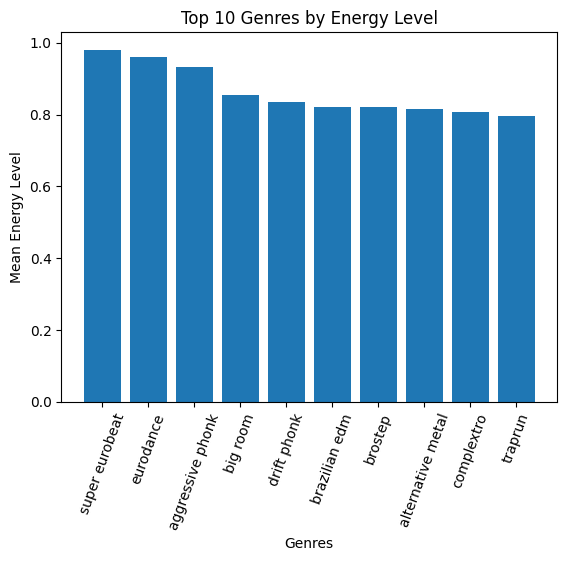

In [16]:
selected_columns = sorted_dataset[['genre', 'energy']]
filtered_df = selected_columns.groupby('genre').filter(lambda x: len(x) >= 10)
genre_energy = filtered_df.groupby('genre')['energy'].mean()
sorted_genres = genre_energy.sort_values(ascending=False)
top_10_genres = sorted_genres.head(10)

plt.bar(top_10_genres.index, top_10_genres)
plt.xlabel('Genres')
plt.ylabel('Mean Energy Level')
plt.title('Top 10 Genres by Energy Level')
plt.xticks(rotation=70)
plt.show()

###  Ploting numberical columns

In [17]:
def plot_numberical_columns(df: DataFrame) -> Callable[..., Any]:
  column_types = df.dtypes
  numerical_columns = column_types[column_types != 'object'].index
  ncols: int = 3
  total_plots: int = len(numerical_columns)
  nrows: int = (total_plots + ncols - 1) // ncols

  fig, axes_list = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
  
  for i, axes in enumerate(axes_list):
    for j, ax in enumerate(axes):
      if i < total_plots:
          ax.hist(df[numerical_columns[3*i+j]])
          ax.set_title(numerical_columns[3*i+j])

  plt.tight_layout()
  
  return numerical_columns
  

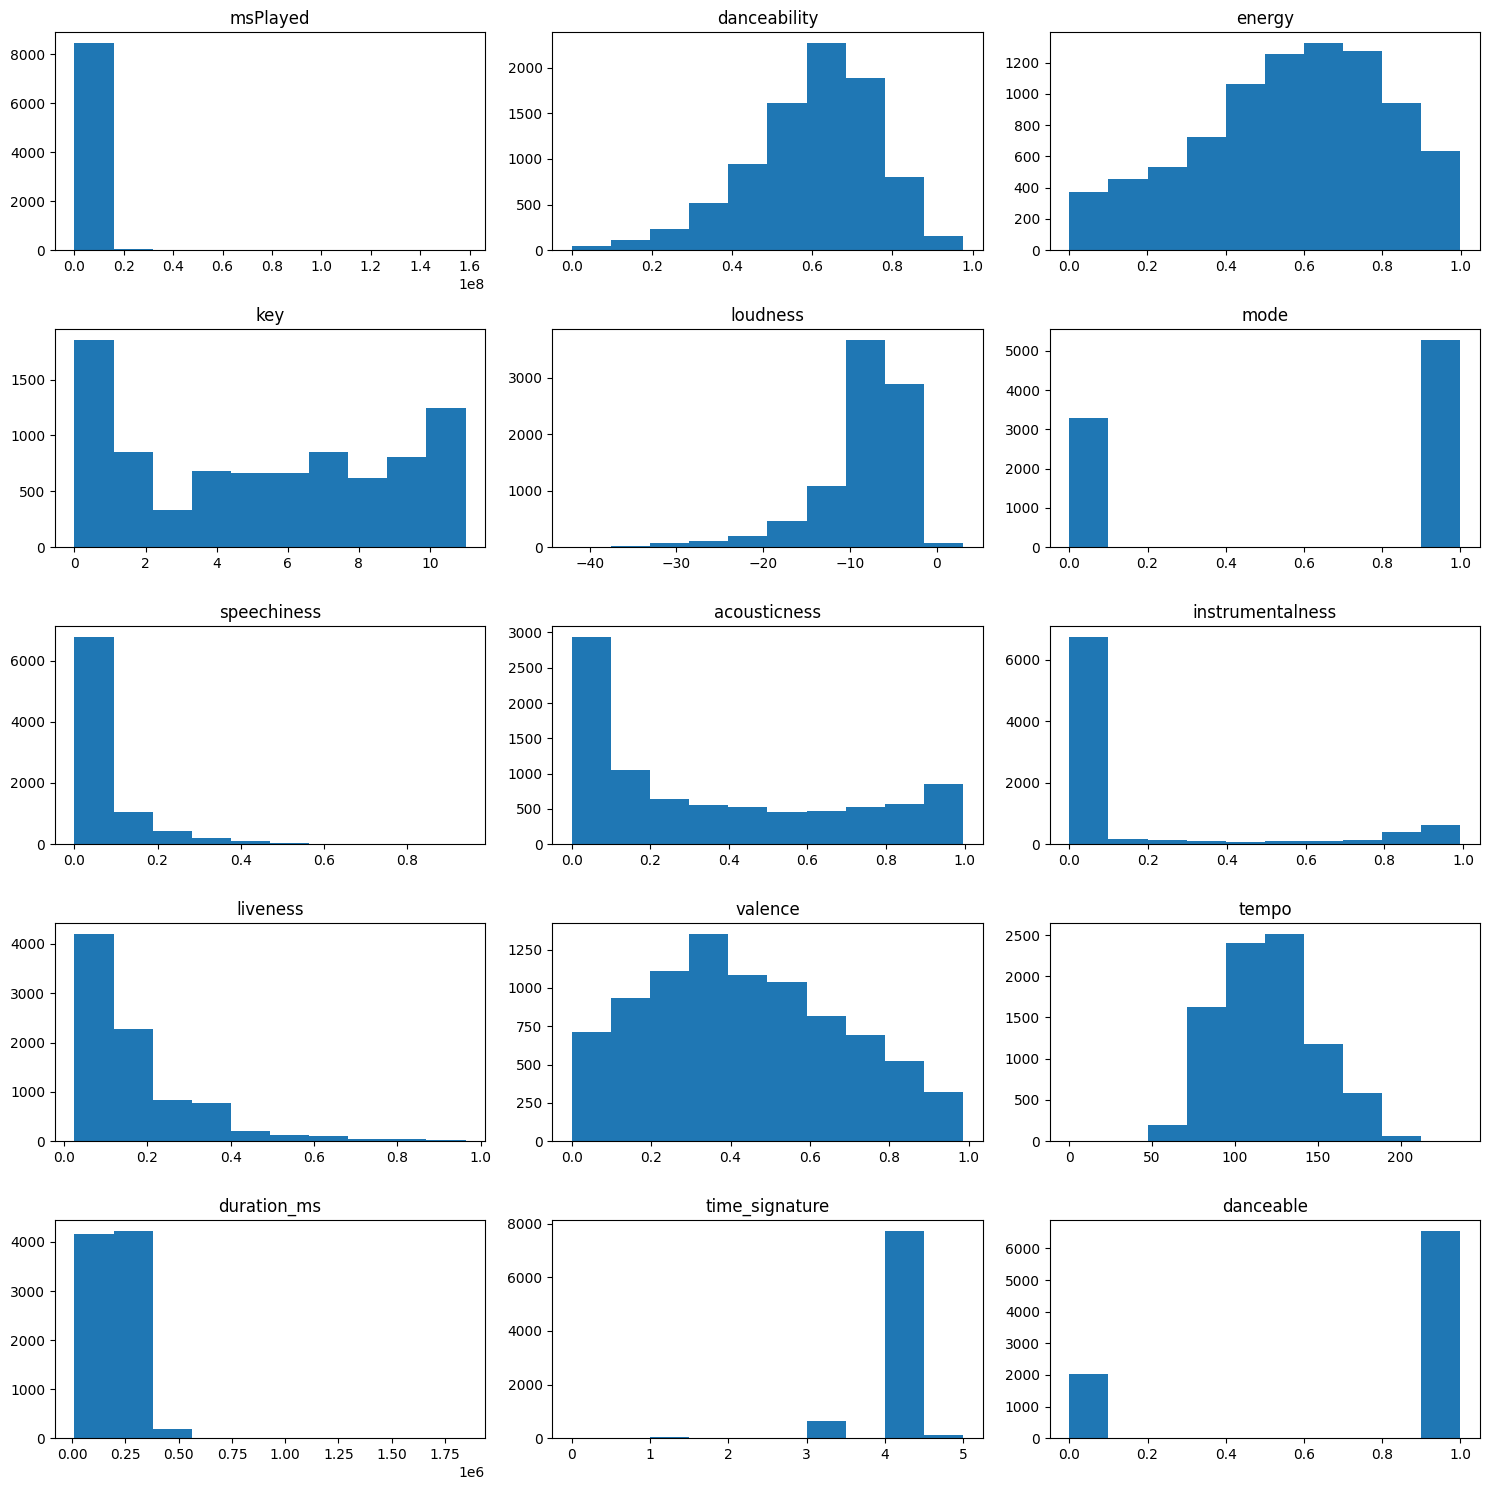

In [18]:
numerical_columns = plot_numberical_columns(sorted_dataset)

###  Normalization

In [19]:
target_column = sorted_dataset['danceable']
normalized_dataset = (sorted_dataset[numerical_columns]-sorted_dataset[numerical_columns].mean())/sorted_dataset[numerical_columns].std()
normalized_dataset = normalized_dataset.drop(columns=['danceable', 'danceability'])
normalized_dataset['danceable'] = target_column

###  Correlation matrix

In [20]:
def draw_correlation_matrix(df: DataFrame) -> None:
  corr_matrix = df.corr()

  plt.figure(figsize=(16, 14))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

  plt.title('Correlation Matrix')

  plt.show()

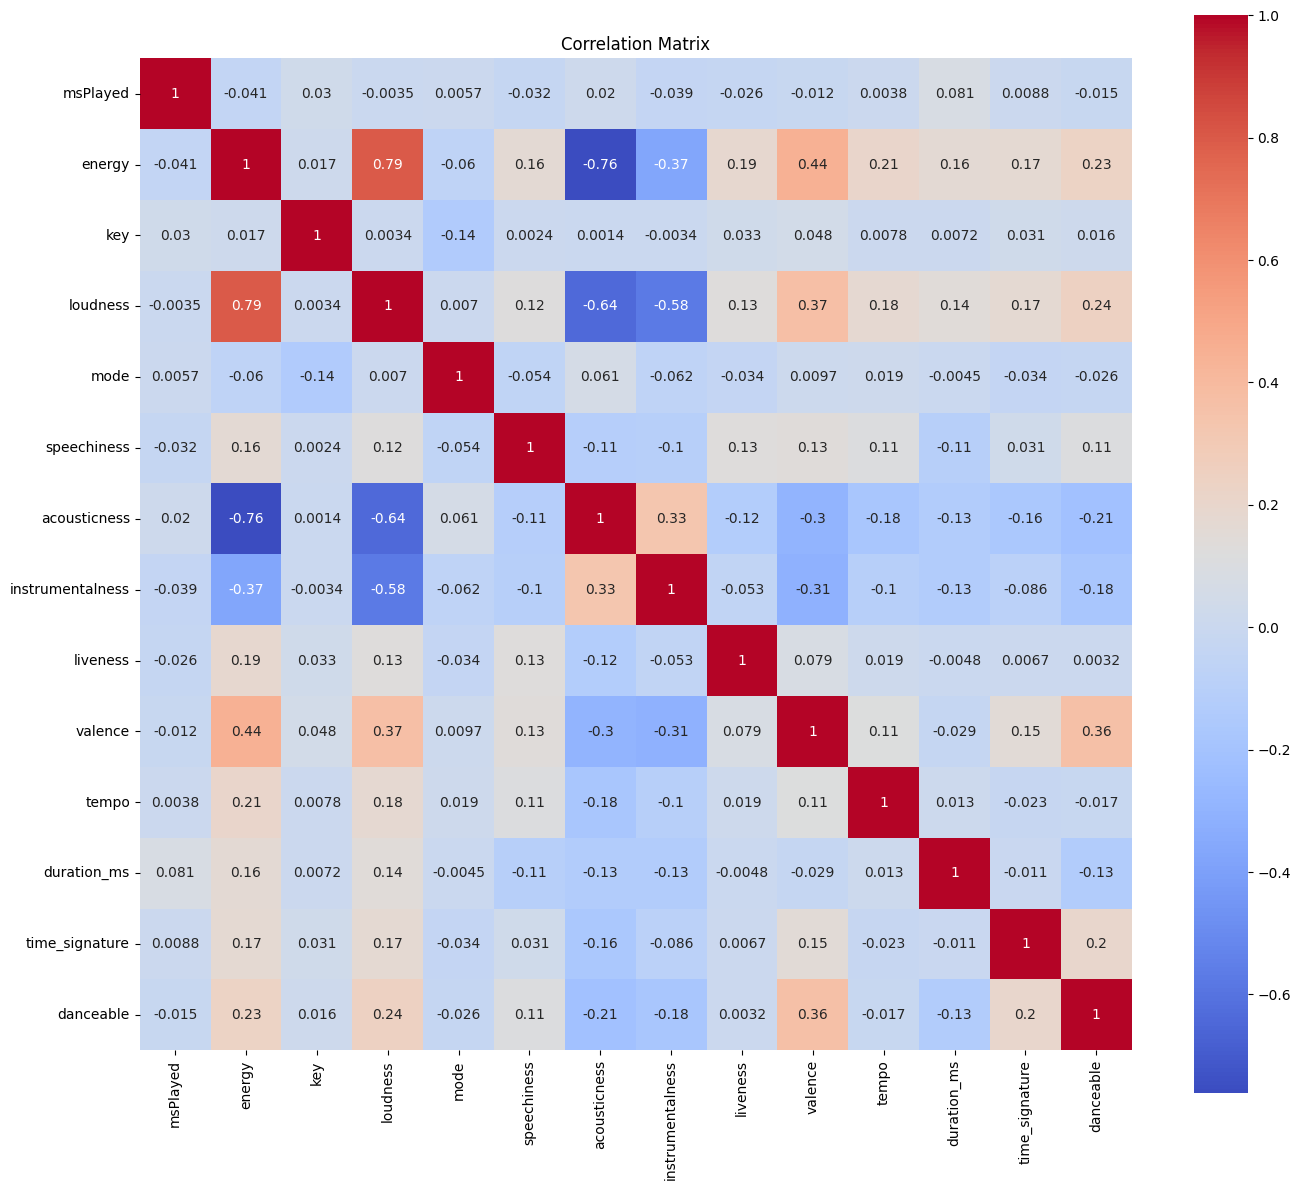

In [21]:
draw_correlation_matrix(normalized_dataset)

### Plot distributions

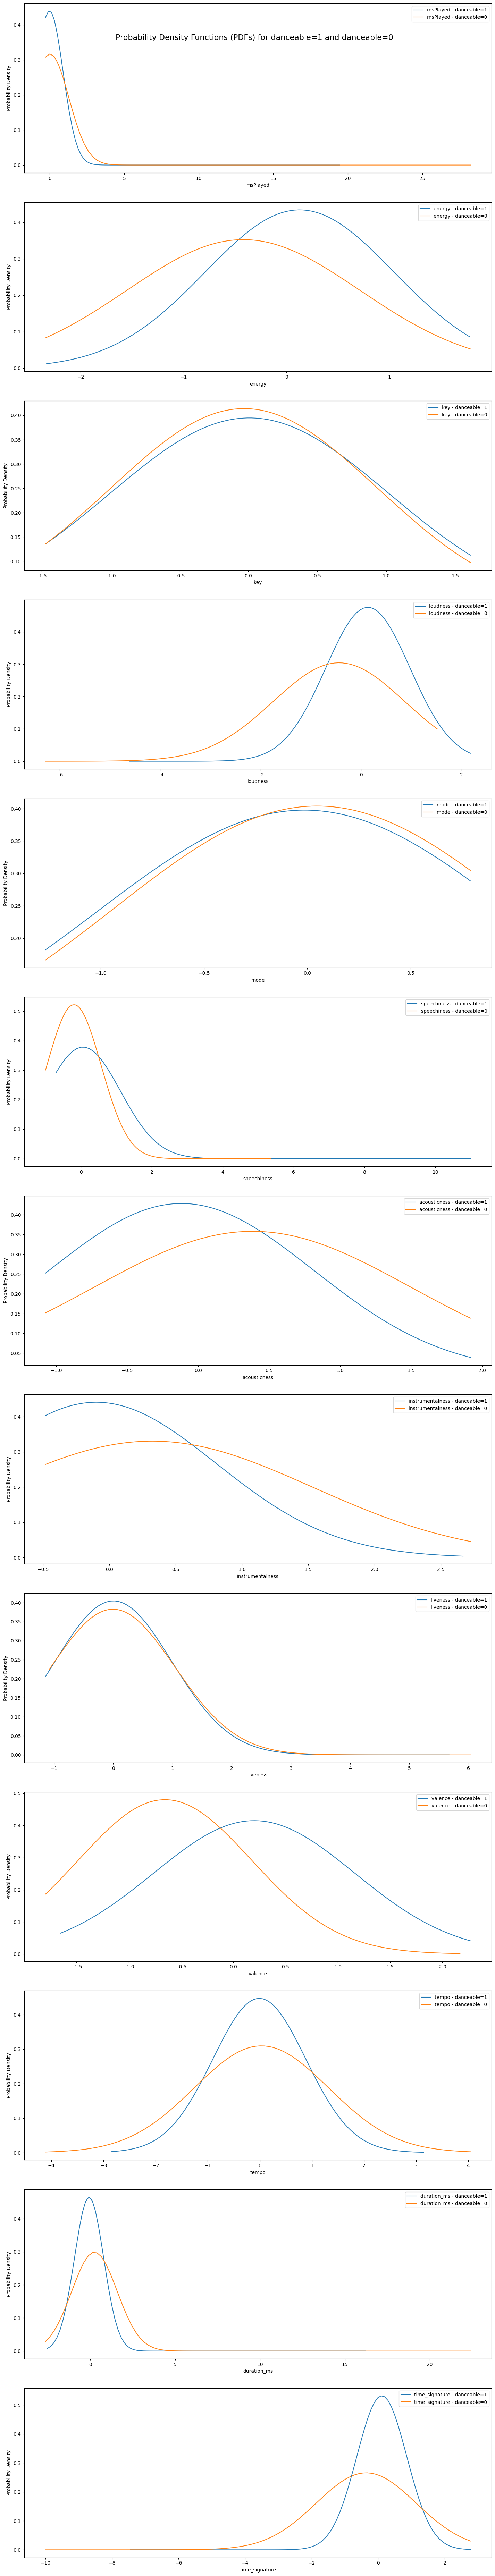

In [22]:
def plot_distributions(df: DataFrame, target_column: str) -> Union[np.float64, np.float64, np.float64, np.float64]:

    assert target_column in df.columns, "target column must be in DataFrame"

    target_column_1 = df[df[target_column] == 1]
    target_column_0 = df[df[target_column] == 0]

    target_column_1 = target_column_1.drop(target_column, axis=1)
    target_column_0 = target_column_0.drop(target_column, axis=1)

    means_1 = target_column_1.mean()
    stds_1 = target_column_1.std()
    means_0 = target_column_0.mean()
    stds_0 = target_column_0.std()

    fig, axes = plt.subplots(nrows=len(df.columns)-1, ncols=1, figsize=(15, 75))
    fig.tight_layout(pad=4)
    
    fig.suptitle(f'Probability Density Functions (PDFs) for {target_column}=1 and {target_column}=0', fontsize=16)
    
    for i, feature in enumerate(df.columns):
        if feature == target_column: continue
        x_1 = np.linspace(target_column_1[feature].min(), target_column_1[feature].max(), 100)
        y_1 = norm.pdf(x_1, means_1[feature], stds_1[feature])

        x_0 = np.linspace(target_column_0[feature].min(), target_column_0[feature].max(), 100)
        y_0 = norm.pdf(x_0, means_0[feature], stds_0[feature])


        axes[i].plot(x_1, y_1, label=f'{feature} - {target_column}=1')
        axes[i].plot(x_0, y_0, label=f'{feature} - {target_column}=0')

        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Probability Density')
        axes[i].legend()

    plt.show()
    
    return means_1, means_0, stds_1, stds_0

means_1, means_0, stds_1, stds_0 = plot_distributions(normalized_dataset, 'danceable')


### Select best feature

`valence` is the best feature for prediction. becase it have the most correlation with target column and two distrebution are distinguishable and discernible from each other.

### Make prediciton

In [23]:
prediction_model = lambda x: 0 if norm.pdf(x, means_1['valence'], stds_1['valence']) < norm.pdf(x, means_0['valence'], stds_0['valence']) else 1

In [24]:
new_test_set = pd.DataFrame()
new_test_set['id'] = test_set['id']
new_test_set['valence'] = (test_set['valence'] - test_set['valence'].mean())/test_set['valence'].std()
new_test_set['danceable'] = test_set['danceability'].apply(lambda x: 0 if x < 0.5 else 1)
new_test_set = new_test_set.dropna()
new_test_set['prediction'] = new_test_set['valence'].apply(prediction_model)

In [25]:
accutacy = lambda df: (df['danceable'] == df['prediction']).sum() / len(df)

In [26]:
print(f"Accuracy is {accutacy(new_test_set)}")

Accuracy is 0.6345848757271285


### Save

In [27]:
new_test_set.to_csv(OUTPUT, index=False)

# $ Theoretical \: Questions $

$
1)
$

$
    {\mathcal {L}}\left ( \mu \right ) = -\ln \left ( \frac{1}{\sqrt{2\pi }\sigma }e^{\frac{\left ( x^{(i)} - \mu  \right )^{2}}{\sigma ^{2}}}\right ) 
$


$
\frac{\partial \mathcal{L(\mu )}}{\partial \mu } = 0 \Rightarrow \sum_{i=1}^{N}\frac{1}{\sigma ^{2}} (x ^{(i)} - \mu  ) = 0 \Rightarrow {\mu\hat{}}_{ML} = \frac{1}{N}
\sum_{i=1}^{N}x^{(i)}
$

$
2)
$

$
A = \begin{bmatrix}
10 & -9\\ 
4 & -2
\end{bmatrix} \rightarrow A\nu  = \lambda \nu \Rightarrow (A - \lambda I).\nu  = 0 \\ \Rightarrow det(A - \lambda I) = 0 \\ \Rightarrow \begin{vmatrix}
10-\lambda  & -9\\ 
4 & -2-\lambda 
\end{vmatrix} = \lambda^{2} - 8\lambda + 16 = 0 \Rightarrow \\ \lambda = 4 \\ \begin{bmatrix}
6 &-9 \\ 
4 & -6
\end{bmatrix}\begin{bmatrix}
x\\ y
\end{bmatrix} = \begin{bmatrix}
0\\0 
\end{bmatrix} \Rightarrow x = \frac{3}{2}y \Rightarrow eigenvector = \begin{bmatrix}
\frac{3}{2}\\ 1
\end{bmatrix}
$


$
3)
$

$
A = \begin{bmatrix}
0 &-1  &5 \\ 
 2&  4& -6\\ 
 1&1  &5 
\end{bmatrix}
\\ det(A) = 6 \neq 0 \Rightarrow rank(A) = 3
$